In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid 
def der_sigmoid(x):
    return sigmoid(x) * sigmoid(1 - x)

In [3]:
# Training data
input_data = np.array([[0.1, 1.2], [0.7, 1.8], [0.8, 1.6], [0.8, 0.6], [1.0, 0.8], [0.3, 0.5], [0.0, 0.2], [-0.3, 0.8], [-0.5, -1.5], [-1.5, -1.3]])
output_data = np.array([[1, 0], [1, 0], [1, 0], [0, 0], [0, 0], [1, 1], [1, 1], [1, 1], [0, 1], [0, 1]])

In [4]:
# Initialize weights and biases randomly
ws = np.random.rand(2, 2)
bs = np.random.rand(1, 2)

# Training the neural network
lr = 0.1  # learning rate
errors_list = []
epochs = 5000   

## save data, weight and bias for epoch 3, 10, 100, 1000
weight = []
bias = []
for i in range(epochs):
    # Forward propagation
    outputs = sigmoid(np.dot(input_data, ws) + bs)
    
    # Backpropagation
    error = 0.5*(output_data-outputs)**2
    errors_list.append(np.mean(error))
    
    de = outputs-output_data
    delta = de * der_sigmoid(outputs)
    ws -= lr * np.dot(input_data.T, delta)
    bs -= lr * np.sum(delta, axis=0, keepdims=True)

    if i+1 in [3, 10, 100, 2000, 5000]:
        weight.append(ws.copy())
        bias.append(bs.copy())

Text(0, 0.5, 'Training Error')

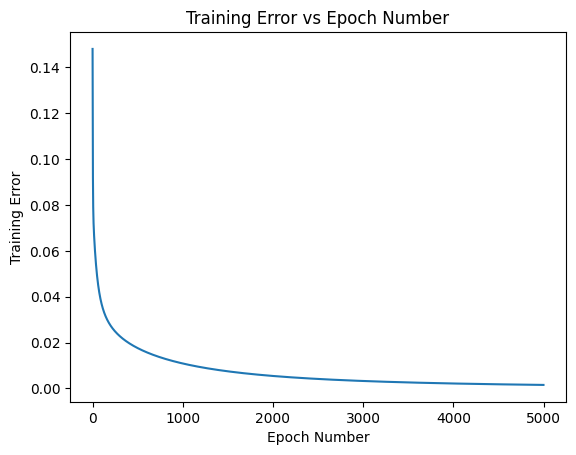

In [5]:
## Plot training error vs epoch number
plt.figure()
plt.plot(range(epochs), errors_list)
plt.title('Training Error vs Epoch Number')
plt.xlabel('Epoch Number')
plt.ylabel('Training Error')

In [6]:
## Plot decision boundary and data points
# decision boundary code reference: 
# https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07
def plot_boundary_data(data, weights, biases):

    x1_min, x1_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    x2_min, x2_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
    x_tmp = np.concatenate([x1.reshape(-1, 1), x2.reshape(-1, 1)], 1)
    y_tmp = np.dot(sigmoid(np.dot(x_tmp, weights) + biases), np.array([[0, 1],[1, 0]]))
    #print(y_tmp.shape)
    y_hat1 = y_tmp[:,0].reshape(x1.shape)
    y_hat2 = y_tmp[:,1].reshape(x1.shape)

    plt.figure()
    
    # plot decision boundary
    plt.contourf(x1, x2, y_hat1, alpha=0.8)
    plt.contourf(x1, x2, y_hat2, alpha=0.8)
    
    ## plot data point
    plt.scatter(data[:, 0], data[:, 1])
    txt = ["G1","G1","G1","G2","G2","G3","G3","G3","G4","G4"]
    for i in range(len(data)):
        plt.annotate(txt[i], xy = (data[i, 0], data[i, 1]), xytext = (data[i,0], data[i,1]+0.05))
    
    plt.title('Decision Boundary and Data Points')
    plt.ylim([data[:,1].min()-1, data[:,1].max()+1])
    plt.xlim([data[:,0].min()-1, data[:,0].max()+1])
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

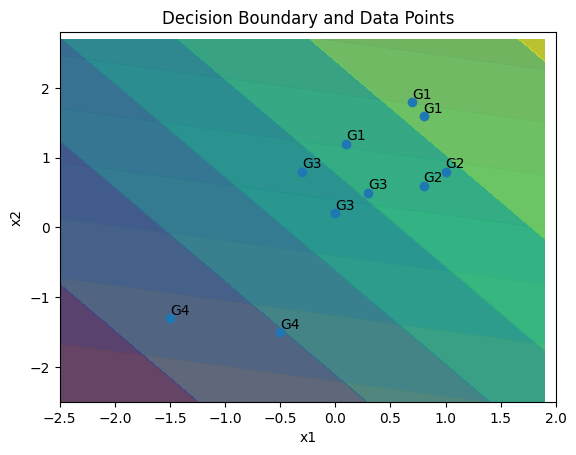

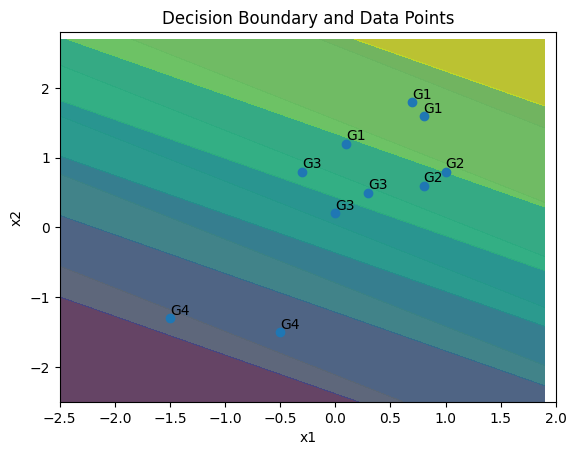

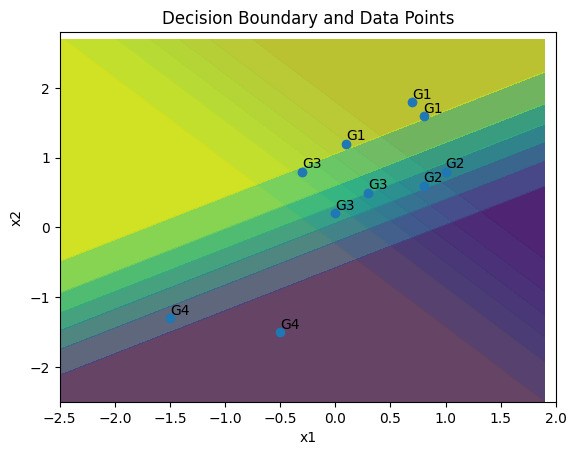

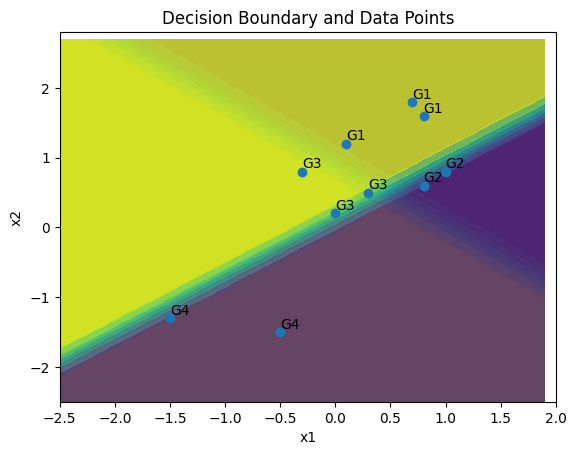

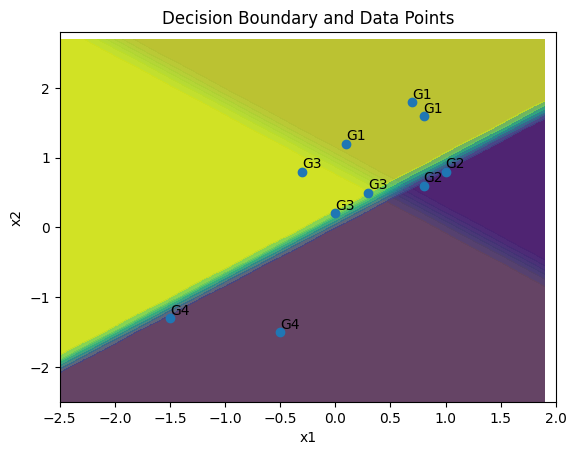

In [7]:
plot_boundary_data(input_data, weight[0], bias[0])
plot_boundary_data(input_data, weight[1], bias[1])
plot_boundary_data(input_data, weight[2], bias[2])
plot_boundary_data(input_data, weight[3], bias[3])
plot_boundary_data(input_data, weight[4], bias[4])

In [8]:
## Plot decision boundary and data points
# method to plot decision boundary line.
def plot_boundary_data1(data, weights, biases):
    
    xtmp = np.arange(data[:,0].min()-1, data[:,0].max()+1, 0.1)
    x1 = xtmp.reshape(len(xtmp),1)
    print(x1.shape, weights.shape, biases.shape)
    
    ## w[0,0]*x1 + w[0,1]*x2 + b0 = 0
    ## w[1,0]*x1 + w[1,1]*x2 + b1 = 0
    x20 = -(biases[0,0] + np.dot(weights[0,0],x1))/weights[0,1]
    x21 = -(biases[0,1] + np.dot(weights[1,0],x1))/weights[1,1]
    
    plt.figure()
    
    # plot decision boundary lines
    plt.plot(x1, x20, c="C0")
    plt.plot(x1, x21, c="C1")
    
    ## plot data point
    plt.scatter(data[:, 0], data[:, 1],c="r")
    txt = ["G1","G1","G1","G2","G2","G3","G3","G3","G4","G4"]
    for i in range(len(data)):
        plt.annotate(txt[i], xy = (data[i, 0], data[i, 1]), xytext = (data[i,0], data[i,1]+0.05))
    plt.title('Decision Boundary and Data Points')
    plt.ylim([data[:,1].min()-1, data[:,1].max()+1])
    plt.xlim([data[:,0].min()-1, data[:,0].max()+1])
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

(45, 1) (2, 2) (1, 2)


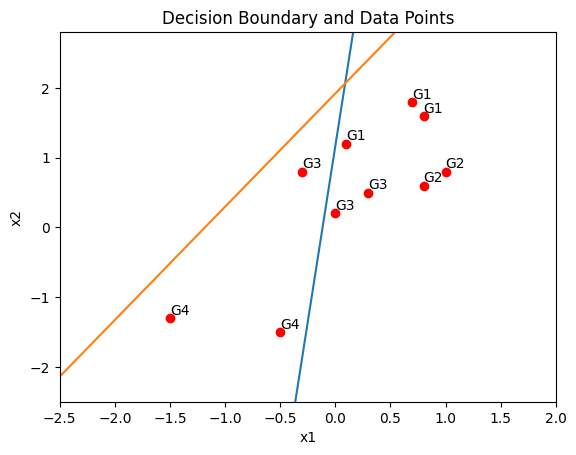

(45, 1) (2, 2) (1, 2)


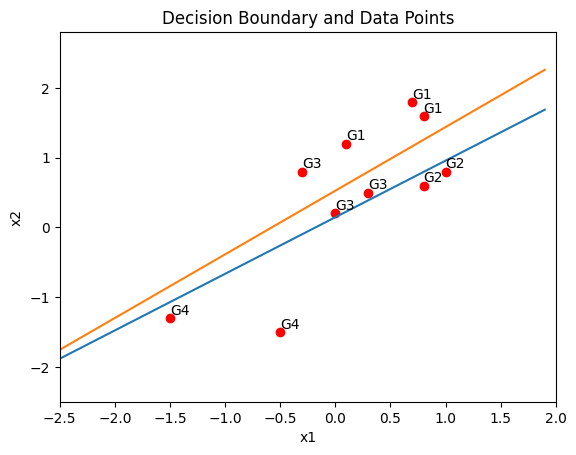

(45, 1) (2, 2) (1, 2)


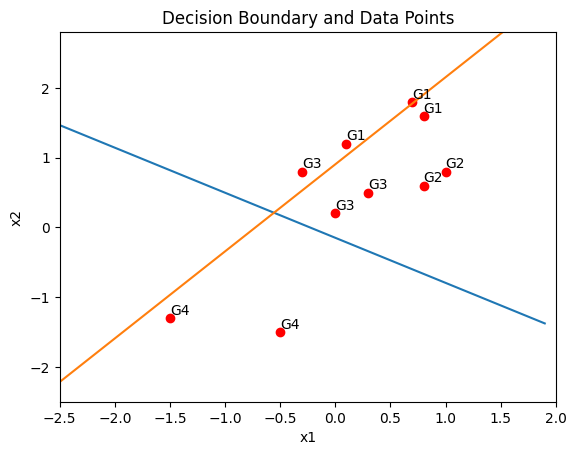

(45, 1) (2, 2) (1, 2)


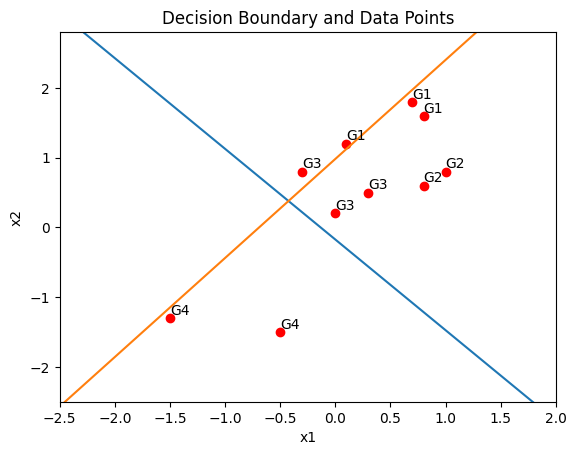

(45, 1) (2, 2) (1, 2)


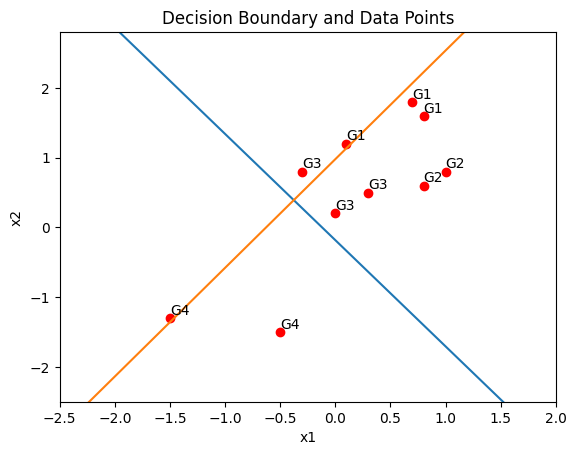

In [9]:
plot_boundary_data1(input_data, weight[0], bias[0])
plot_boundary_data1(input_data, weight[1], bias[1])
plot_boundary_data1(input_data, weight[2], bias[2])
plot_boundary_data1(input_data, weight[3], bias[3])
plot_boundary_data1(input_data, weight[4], bias[4])

In [9]:
# weight[0], weight[1], weight[2]

In [10]:
# bias[0], bias[1], bias[2]